In [0]:
# importing the necessary libraries
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<img src="http://drive.google.com/uc?export=view&id=18q7KL4aV6McMtaid_1Let2aGkw6d4QYn" width=45%>

In [0]:
class GridWorld:
    """
    The gridworls is a frequently used demo environment in reinforcement learning
    to try and test ideas.
    Today, we will use it to understand the concepts so far.
    
    The environment: (see image)
    * cells: the agent can step on a cell. There is exactly one cell to start from.
    This is the top left corner. There is one terminal cell where the walking ends, 
    the agent can not leave it (blue).
    * obstacles: there are cells where the agent can not step. (gray)
    * agent: it can move from one cell to an other neighboring cell. 
    Possible directions: up, down, left, right. Each transition happens with probability 1.
    * reward: after each transition the agent receives -1 point. In the terminal cell, no reward
    received anymore.
    
    Implement the environment below!
    """
    def __init__(self, size, start_cell, obstacles, terminating_state):
        self.size = size
        self.start = start_cell
        self.obstacles = obstacles
        self.termin = terminating_state
        self.current_cell = self.start
    
    def reset(self):
        self.current_cell = self.start
        # ----- reset the current cell to the start cell to start again -----

    def transition(self, cell, action):
        # ----- IMPLEMENT FUNCTION -----
        # cell = (row, column) indices
        # action: 0 left, 1 up, 2 right, 3 down
        # returns: What will be the next state
        # Take care of the borders of the grid!
        
        # ....

        # Formatting the actions and handling the movements across the grid

        if action == 0 and cell[1]!= 0 and cell[1]-1 not in [obs[1] for obs in self.obstacles if obs[0] == cell[0]]:
          cell = [cell[0], cell[1] - 1]
        elif action == 1 and cell[0]!= 0 and cell[0]-1 not in [obs[0] for obs in self.obstacles if obs[1] == cell[1]]:
          cell = [cell[0] - 1, cell[1]]
        elif action == 2 and cell[0]!= 0 and cell[1]+1 != self.size[1] and cell[1]+1 not in [obs[1] for obs in self.obstacles if obs[0]==cell[0]]: 
          cell = (cell[0],cell[1]+1) 
        elif action == 3 and cell[0]+1 != self.size[0] and cell[0]+1 not in [obs[0] for obs in self.obstacles if obs[1]==cell[1]]:
          cell = (cell[0]+1,cell[1])

        self.current_cell = cell

        return cell

    def reward(self, cell, action):
        # ----- RETURN REWARD -----
        # -1 if not in the terminal state
        if cell!= self.termin and self.current_cell != self.termin:
          return -1
        else:
          return 0

    def in_terminal(self):
        return self.current_cell == self.termin

In [0]:
class DPsolver:
    """
    This solver is based on the Bellman-equation and it is 
    solved by iteratively.
    The action-value is used to represent the utility of the 
    actions and states.
    """

    def __init__(self, gridworld, gamma_discount_factor, iterations):
        # setting parametes according to the input parameters
        self.gridworld = gridworld
        self.gamma_discount_factor = gamma_discount_factor
        self.iterations = iterations
        size = gridworld.size
        # initialize accumulaters
        self.cntr = 0
        self.sum_rewards = []
        self.path = []
        # ----- initialize the table for Q-function -----
        # A Q-table has states in the rows and actions in the columns
        self.q_table = np.zeros((4, size[0], size[1]))

    def step(self):
        # ----- WRITE THE CODE BELOW -----
        # implement one step in the value iteration
        rows, cols = self.gridworld.size
        for row in range(0,rows):
          for col in range(0,cols):
            for action in range(0,4):
              next_cell = self.gridworld.transition(cell=(row, col), action=action)
              rewards = self.gridworld.reward(cell=(row, col),action=action)
              (row2, col2) = next_cell
              #print('Loop: current cell:',row,col,'action:',action,'next cell:',row2, col2,'reward:',sum_rewards, self.gridworld.current_cell)
              self.q_table[action, row, col] = rewards + self.gamma_discount_factor * max(self.q_table[:, row2, col2])
        # increase the counter
        self.cntr += 1
        # add the return to the sum_rewards list
        self.sum_rewards.append(self.trajectory())

    def trajectory(self):
        # ----- IMPLEMENT THE FUNCTION -----
        # reset the gridworld
        # # calculate the return along a trajectory followed by the current policy
        # # when started from the start_cell
        # # TODO
        self.gridworld.reset()
        self.path = []
        sum_rewards = 0
        itr = 0
        while not self.gridworld.in_terminal() and itr < 20:
            r, c = self.gridworld.current_cell
            action = np.argmax(self.q_table[:, r, c])
            self.gridworld.transition((r, c), action)
            sum_rewards += self.gridworld.reward((r, c), action)
            itr += 1
            self.path.append((r, c))
        return sum_rewards

    def is_learning_finished(self):
        # ----- IMPLEMENT THIS FUNCTION -----
        # check whether learning has finished, return it
        if self.cntr != self.iterations:
          return False
        else:
          print("Finished learning!")
          return True

In [0]:
def plot_learning_curve(ql):
    values = ql.sum_rewards
    x = list(range(len(values)))
    y = values
    plt.plot(x, y, 'ro')
    plt.show()

-20
-20
-20
-20
-20
-20
-20
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7
-7


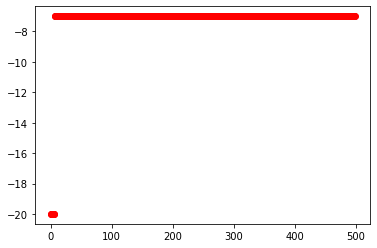

In [0]:
# grid world parameters
size = (6, 6)
start_cell = (0, 0)
obstacles = [(3, 3)]
terminating_state = (3, 5)
# q learning parameters
gamma = 0.9
# ----- What is the minimum required number of iterations? -----
iterations = 500

gw = GridWorld(size, start_cell, obstacles, terminating_state)
solver = DPsolver(gw, gamma, iterations)

while not solver.is_learning_finished():
    solver.step()
    sum_rewards = solver.sum_rewards[-1]
    print(sum_rewards)

sum_rewards = solver.trajectory()
print(sum_rewards)
plot_learning_curve(solver)